# TP 4

### Par Mathieu Marquis, Charles-Antoine Parent et Thomas Piuze

In [2]:
import numpy as np
import graphinglib as gl

## 4.1 : Intégration numérique de la dynamique épidémiologique SIS

### **a)** Identifiez les deux états stationnaires $0 \leq i^*_{1,2} \leq 1$ pour lesquels $\frac{di}{d\tau} = 0$, de même que les conditions sur $R_0$ pour lesquelles ces états stationnaires sont possibles (s’il y a lieu).

À partir de l'équation suivante:
$$ \frac{di}{d\tau} = (R_0-1)i-R_0i^2, $$
nous pouvons identifier les deux états stationnaires:
$$ \begin{align*}
    0 &= (R_0-1)i-R_0i^2 \\
    0 &= i(R_0-1-R_0i) \\
    i &= \begin{cases}
            0 \\
            \frac{R_0-1}{R_0}
        \end{cases}
    \end{align*} $$
Un premier état stationnaire se produit pour $i^*_1=0$, ce qui est logique, car en l'absence d'individus infectés, la maladie ne peut se propager. Un deuxième cas, moins intuitif, se produit pour $i^*_2=\frac{R_0-1}{R_0}$. Le premier cas n'implique aucune condition sur $R_0$. En revanche, le deuxième cas restreint les valeurs possibles de $R_0$, car nous devons avoir $0 \leq i^*_2 \leq 1$. Puisque $R_0=\beta/\alpha$, et que $\alpha,\beta>0$, $R_0$ est toujours positif. Nous avons donc:
$$ \begin{align*}
        0 &\leq \frac{R_0-1}{R_0} \leq 1 \\
        0 &\leq R_0-1 \leq R_0 \\
        1 &\leq R_0 \leq R_0+1
    \end{align*} $$
La condition $R_0 \leq R_0+1$ est redondante. Cependant, la condition $R_0 \geq 1$ est plus restrictive, car elle nécessite que $\beta \geq \alpha$.

### **b)** Obtenez une solution analytique $i(\tau)$ (valide pour $i \geq 0$). Vous noterez $i(0) = i_0$. Indice : Il s’agit d’une EDO de Bernouilli.

L'EDO de Bernouilli à résoudre est:
$$ \frac{di}{d\tau} = (R_0-1)i-R_0i^2 $$
Multiplions cette équation par $-1/i^2$:
$$ -\frac{1}{i^2}\frac{di}{d\tau} = \frac{(1-R_0)}{i}+R_0 $$ 
Posons ensuite le changement de variable $u=\frac{1}{i}$, de telle sorte que:
$$ u = \frac{1}{i} \longrightarrow \frac{du}{d\tau} = \frac{du}{di}\frac{di}{d\tau} = -\frac{1}{i^2}\frac{di}{d\tau} $$
L'équation à résoudre devient alors:
$$ \frac{du}{d\tau} = (1-R_0)u+R_0 $$
Soit une équation différentielle ordinaire linéaire du premier ordre. La forme générale d'une telle équation est:
$$ y'(x)+p(x)y(x) = q(x) $$
Dont la solution est donnée par:
$$ y(x) = e^{-\int p(x)dx}\left(\int e^{\int p(x)dx}q(x)dx+C\right) $$
Où $C$ est une constante déterminée par la condition initiale. Dans notre cas, $x=\tau$, $y(x)=u(\tau)$, $y'(x)=\frac{du(\tau)}{d\tau}$, $p(x)=(R_0-1)$ et $q(x)=R_0$. La solution est donc:
$$ \begin{align*}
        u(\tau) &= e^{-\int (R_0-1)d\tau}\left(\int e^{\int (R_0-1)d\tau}R_0d\tau+C\right) \\
        &= e^{-(R_0-1)\tau}\left(\int R_0e^{(R_0-1)\tau}d\tau+C\right) \\
        &= e^{-(R_0-1)\tau}\left(\frac{R_0}{R_0-1}e^{(R_0-1)\tau}+C\right) \\
        &= Ce^{-(R_0-1)\tau}+\frac{R_0}{R_0-1}
    \end{align*} $$
Puisque $i(0)=i_0$, $u(0)=\frac{1}{i(0)}=\frac{1}{i_0}$. Par conséquent:
$$ u(0) = C+\frac{R_0}{R_0-1} = \frac{1}{i_0} \longrightarrow C = \frac{1}{i_0}-\frac{R_0}{R_0-1} $$
Donc:
$$ \begin{align*}
        u(\tau) &= \left(\frac{1}{i_0}-\frac{R_0}{R_0-1}\right)e^{-(R_0-1)\tau}+\frac{R_0}{R_0-1} \\
        i(\tau) &= \frac{1}{i(\tau)} \\
        i(\tau) &= \frac{1}{\left(\frac{1}{i_0}-\frac{R_0}{R_0-1}\right)e^{-(R_0-1)\tau}+\frac{R_0}{R_0-1}} \\
        i(\tau) &= \frac{i_0(R_0-1)}{\left(R_0(1-i_0)-1\right)e^{-(R_0-1)\tau}+R_0i_0}
    \end{align*} $$
Soit la solution recherchée.

### **c)** Implémentez les intégrateurs d’Euler, de Runge-Kutta d’ordre 2 et de Runge-Kutta d’ordre 4. Vos fonctions devront retourner les trajectoires composées des fractions de la population infectée $\{i_s\}_{s=0,...,T}$ et des temps $\{\tau_s\}_{s=0,...,T}$ auxquels ces fractions correspondent. La valeur de $T$ sera fixée ci-dessous.

In [3]:
def sol_analytique(t: float, R_0: float, i_0: float) -> float:
    return i_0*(R_0-1)/((R_0*(1-i_0)-1)*np.e**(-(R_0-1)*t)+R_0*i_0)

tau = np.linspace(0, 10, 1000)

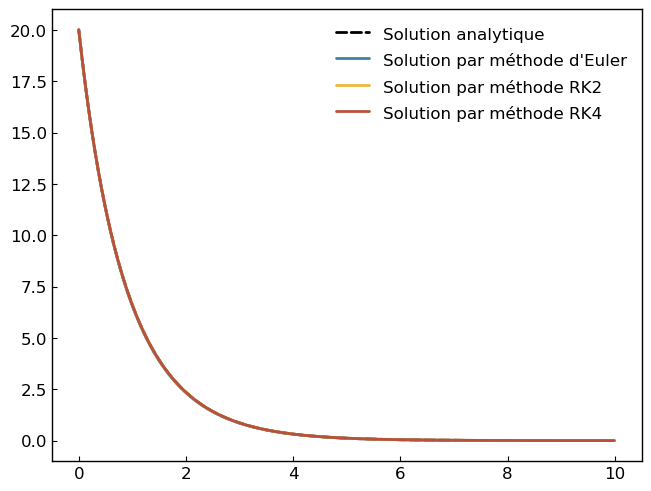

In [5]:
def f(i: float, t: float, R_0: float=0.01) -> float:
    return (R_0 - 1)*i - R_0 * i**2

def euler(func: callable, a: float, b:float, h:float, x0: float=0) -> tuple[np.ndarray, np.ndarray]:
    """
    Méthode d'Euler pour résoudre une équation différentielle ordinaire.
    
    Paramètres
    ----------
    func (callable) : Fonction représentant l'équation différentielle.
    a (float) : Paramètre initial.
    b (float) : Paramètre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        x += h * func(x, t)
    return tpoints, xpoints

def rk2(func: callable, a: float, b:float, h:float, x0: float=0) -> tuple[np.ndarray, np.ndarray]:
    """
    Méthode de Runge-Kutta d'ordre 2 pour résoudre une équation différentielle ordinaire.
    
    Paramètres
    ----------
    func (callable) : Fonction représentant l'équation différentielle.
    a (float) : Paramètre initial.
    b (float) : Paramètre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        k1 = func(x, t)
        k2 = func(x + h * k1 / 2, t + h / 2)
        x += h * k2
    return tpoints, xpoints

def rk4(func: callable, a: float, b:float, h:float, x0: float=0) -> tuple[np.ndarray, np.ndarray]:
    """
    Méthode de Runge-Kutta d'ordre 4 pour résoudre une équation différentielle ordinaire.
    
    Paramètres
    ----------
    func (callable) : Fonction représentant l'équation différentielle.
    a (float) : Paramètre initial.
    b (float) : Paramètre final.
    h (float) : Pas de temps.
    x0 (float) : Valeur initiale de la solution.
    """
    tpoints = np.arange(a, b, h)
    xpoints = np.zeros_like(tpoints)
    x = x0
    for i, t in enumerate(tpoints):
        xpoints[i] = x
        k1 = func(x, t)
        k2 = func(x + h * k1 / 2, t + h / 2)
        k3 = func(x + h * k2 / 2, t + h / 2)
        k4 = func(x + h * k3, t + h)
        x += (h / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return tpoints, xpoints


t, i = euler(f, 0, 10, 0.01, 20)
fig = gl.Figure()
fig.add_elements(
    gl.Curve(tau, sol_analytique(tau, 0.01, 20), label='Solution analytique', color='k', line_style='--'),
    gl.Curve(t, i, label="Solution par méthode d'Euler"),
    gl.Curve(t, rk2(f, 0, 10, 0.01, 20)[1], label="Solution par méthode RK2"),
    gl.Curve(t, rk4(f, 0, 10, 0.01, 20)[1], label="Solution par méthode RK4"),
)
fig.show()

### **d)** Implémentez la méthode du ratio dorée (ou un autre optimisateur de votre choix) qui vous permettra de trouver la longueur de pas $h$ permettant d’obtenir une erreur sur la trajectoire numérique $\varepsilon(h)$ bornée par $(1\pm0.01)\delta$, où $\delta$ sera spécifiée ci-dessous. L’erreur sera calculée selon
$$ \varepsilon(h) = \sqrt{\frac{1}{T+1}\sum_{s=0}^T(i_s-i(\tau_s))^2}, $$
### où $i(\cdot)$ est la solution analytique obtenue en **b**. N’hésitez pas à considérer une méthode euristique pour bien cerner l’intervalle de départ pour $h$ fourni à la méthode du ratio doré. À l’aide de votre algorithme, identifiez une valeur de pas d’intégration $h$ permettant de limiter $\varepsilon(h)$ à l’intervalle $[0.99\delta,1.01\delta]$ pour plusieurs valeurs de $\delta \in [10^{-9},10^{-6}]$, pour plusieurs couples $(i_0,R_0)$ et pour chacun des trois intégrateurs implémentés en **c**.

In [ ]:
# Méthode du ratio doré
deltas = np.linspace(1e-9, 1e-6, 5)

### **e)** À l’aide des résultats obtenus en **d**, obtenez numériquement l’ordre $d$ de l’erreur globale $\varepsilon(h) \propto h^d$ effectuée par chacun des trois intégrateurs implémentés en **c**. Il est possible d’obtenir $d$ via une régression (linéaire) en observant que $\log \varepsilon(h) \propto d \log h$.

## 4.2 : Simulation Monte-Carlo de la dynamique SIS

### **a)** Déterminez l’expression qui gouverne la probabilité de générer un graphe de l’ensemble $G(n,p)$ qui contiendra $m$ liens. Détaillez votre raisonnement pour obtenir cette expression.

La probabilité qu'un lien se crée est $p$, ce qui signifie que la probabilité qu'un lien soit refusé est $(1-p)$. Pour un ensemble de $n$ noeuds, le nombre possible de liens entre deux noeuds différents est le coefficient binomial ${n}\choose{2}$, c'est-à-dire:
$$ \begin{align*}
        {n}\choose{2}  &=  \frac{n!}{2!(n-2)!} = \frac{n(n-1)(n-2)!}{2(n-2)!} = \frac{n(n-1)}{2} 
    \end{align*} $$
Ce résultat peut aussi être obtenu par la logique suivante. Choisissons un premier noeud parmi les $n$ noeuds. Ce noeud peut créer jusqu'à $n-1$ liens avec tous les autres noeuds du graphe. Prenons ensuite un second noeud. Ce deuxième noeud peut également créer $n-1$ liens avec ses voisins. Or, un de ces $n-1$ liens est avec le premier noeud, et a donc déjà été compté. Il y a donc $n-2$ nouveaux liens possibles. Pour le troisième noeud, il y aura $n-3$ nouveaux liens possibles, et ainsi de suite. Pour l'avant-dernier noeud, il ne restera plus qu'un nouveau lien possible à créer, et pour le dernier noeud, il n'y en aura aucun. Le nombre possible de liens est donc:
$$ n-1+n-2+n-3+...+1+0 = \sum_{i=1}^{n-1}i $$
Il existe une manière ingénieuse d'effectuer cette sommation. Exprimons-la deux fois en inversant l'ordre des termes:
$$ \begin{align*}
        \sum_{i=1}^{n-1}i &= 1 + 2 + ... + n-2 + n-1 \\
        \sum_{i=1}^{n-1}i &= n-1 + n-2 + ... + 2 + 1
    \end{align*} $$
On remarque qu'en additionnant les termes superposés, on obtient $n-1$ fois $n$. Ainsi:
$$ 2\sum_{i=1}^{n-1}i = n(n-1) \longrightarrow \sum_{i=1}^{n-1}i = \frac{n(n-1)}{2} $$
Ce qui montre que le nombre de liens possibles est $\frac{n(n-1)}{2}$, que nous appellerons pour la suite ${n}\choose{2}$, car ces deux expressions sont équivalentes. Pour revenir à la question, la probabilité $P(m)$ que $m$ liens soient créés et que les ${{n}\choose{2}} - m$ autres liens soient refusés est simplement:
$$ P(m) = p^m(1-p)^{{{n}\choose{2}}-m} $$
Or, il y a plus d'un seul graphe comportant $m$ liens, car il y a ${{n}\choose{2}}\choose{m}$ combinaisons possibles de $m$ liens. La probabilité totale de générer un graphe de l'ensemble $G(n,p)$ comportant $m$ liens, peu importe ces liens, est donc:
$$ P_{tot}(m) = {{{n}\choose{2}}\choose{m}}p^m(1-p)^{{{n}\choose{2}}-m} $$
Ce qui correspond à une distribution binomiale.

### **b)** Déterminez également le nombre de liens moyens que possède un graphe issu du modèle $G(n,p)$ ainsi que l’écart-type sur le nombre de liens. Détaillez votre raisonnement pour obtenir ces expressions. Si des propriétés sont utilisées, elles doivent être dûment citées et/ou démontrées également.

### **c)** Implémentez un algorithme qui génère des graphes en utilisant le modèle d’Erdős–Rényi avec les paramètres $n = 100$ et $p = 0.05$. Une fois programmé, obtenez empiriquement la moyenne, l’écart-type et la distribution du nombre de liens dans les réseaux issus de votre algorithme. Comparez ces résultats aux valeurs obtenues en **a** et **b**. (Indice : un graphe est parfois simplement représenté par sa matrice d’adjacence. Vous pouvez utiliser cette représentation ou une autre structure de votre choix qui permet d’encoder l’information pertinente.)

### **d)** Implémentez la simulation de la dynamique SIS sur réseau en utilisant le module `NetworkX`. Une fois votre algorithme fonctionnel, générez les courbes moyennes du nombre de nœuds infectés et susceptibles en fonction du temps pour le réseau fourni (*reseau.adj*). Pour ouvrir ce réseau, utilisez la fonction `read_adjlist()` de `NetworkX`. Pour vos simulations, utilisez $\alpha = 0.05$, $\beta = 0.1$, une proportion initiale de nœuds infectés de 10% et 100 pas de temps. Comparez les résultats de la simulation avec le modèle étudié dans la première partie du travail et discutez.